### Extract MP components from synthetic data and write to MAT file

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_float
from scipy.io import savemat

from imagerep import mp_gaussian, reconstruct_image


In [7]:
# Input and output paths
IN_FPATH = '/home/mn2822/Desktop/WormTraces/animal_056_head/run401.mat'
OUT_FPATH = '/home/mn2822/Desktop/WormTracking/data/synthetic/syn_data_mp.mat'

# Start and stop times for extraction
T_START = 0
T_STOP = 50

# Covariance values for each dimension
#COV_DIAG = [4.0, 4.0, 1.0]
COV_DIAG = [5.0, 5.0, 5.0]

# Number of MP iterations to run
#N_ITER = 500
N_ITER = 300


In [8]:
cov = np.diag(COV_DIAG)
means = []
weights = []

with h5py.File(IN_FPATH, 'r') as f:

    dset = f.get('data')

    #for t in range(T_START, T_STOP):
    for t in range(1):

        print(f'Frame: {t}')

        # Load frame
        img_raw = dset[t, :, :, :]
        img_raw = np.moveaxis(img_raw, [0, 1, 2], [2, 0, 1])
        img = img_as_float(img_raw)

        # Extract MP components from frame
        mus, wts, _ = mp_gaussian(img, cov, N_ITER)
        means.append(mus)
        weights.append(wts)

Frame: 0


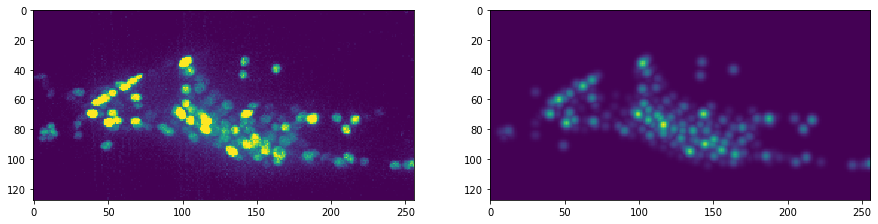

In [9]:
img_recon = reconstruct_image(mus, [cov] * N_ITER, wts, img.shape)

plt.figure(figsize=(15, 15))
    
plt.subplot(121)
plt.imshow(np.max(img, 2).T)
    
plt.subplot(122)
plt.imshow(np.max(img_recon, 2).T)